In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import glob
import os
import time
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('./data/cleaned_uci_data_06_19.csv')

In [4]:
df.shape

(7048, 16)

In [5]:
df.head()

,Unnamed: 0,Start_date,End_Date,Name,Country,Category,Class,Season,Race_Days,uci_name,continent,name,country,latitude,longitude,Continent
0,0,2017-10-24,2017-10-29,Vuelta a Colombia Femenina Oro y Paz,COLOMBIA,WE,2.2,2018,6.0,COLOMBIA,AMERICAS,Colombia,CO,4.570868,-74.297333,Americas
1,1,2017-10-23,2017-11-01,Vuelta a Guatemala,GUATEMALA,ME,2.2,2018,10.0,GUATEMALA,AMERICAS,Guatemala,GT,15.783471,-90.230759,Americas
2,2,2017-10-27,2017-11-05,Tour du Faso,BURKINA FASO,ME,2.2,2018,10.0,BURKINA FASO,AFRICA,Burkina Faso,BF,12.238333,-1.561593,Africas
3,3,2017-10-27,2017-11-05,Vuelta Ciclista a Venezuela,BOLIVARIAN REPUBLIC OF VENEZUELA,ME,2.2,2018,10.0,BOLIVARIAN REPUBLIC OF VENEZUELA,AMERICAS,Venezuela,VE,6.423750,-66.589730,Americas
4,4,2017-10-28,2017-11-05,Tour of Hainan,PEOPLE'S REPUBLIC OF CHINA,ME,2.HC,2018,9.0,PEOPLE'S REPUBLIC OF CHINA,ASIA,China,CN,35.861660,104.195397,Asia


In [6]:
# Making filtered dataframes for graphing
me = df.loc[df['Category']=='ME'] #Elite Men
we = df.loc[df['Category']=='WE'] #Elite Women
mj = df.loc[df['Category']=='MJ'] #Junior Men
u23 = df.loc[df['Category']=='MU'] #U23 Men
wj = df.loc[df['Category']=='WJ'] #Junior Women

americas = df.loc[df['Continent']=='Americas']
europe = df.loc[df['Continent']=='Europe']
asia = df.loc[df['Continent']=='Asia']
africa = df.loc[df['Continent']=='Africas']
oceania = df.loc[df['Continent']=='Oceania']

In [7]:
def stackedbar(df,x,y,title,outname):
    df.plot(kind='bar',stacked=True)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    fig.ylimit=(0,400)
    fig.xlimit=(0,30)
    # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
    # Add some labels and title
    plt.xlabel(x, fontsize=12, fontweight='bold')
    plt.ylabel(y, fontsize=12, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(loc='best')
# Save the figure
    plt.savefig(f'./graphics/{outname}.png')

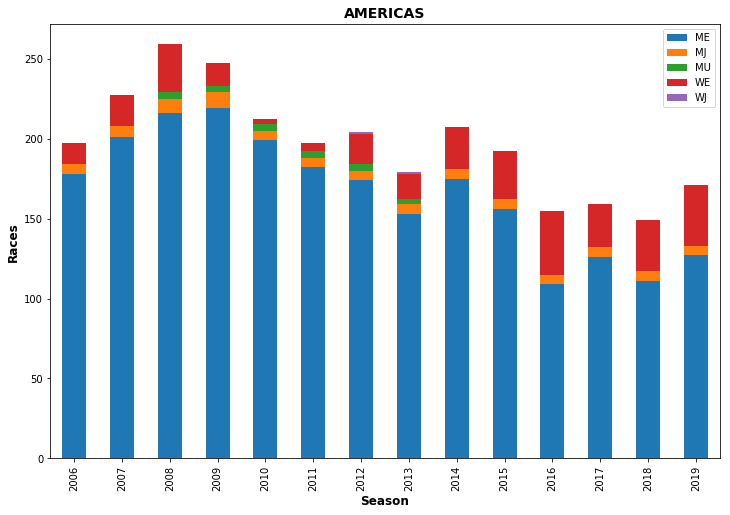

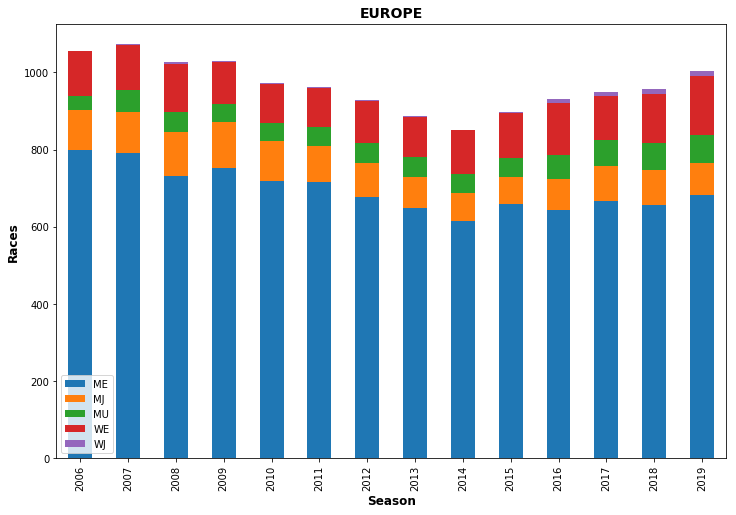

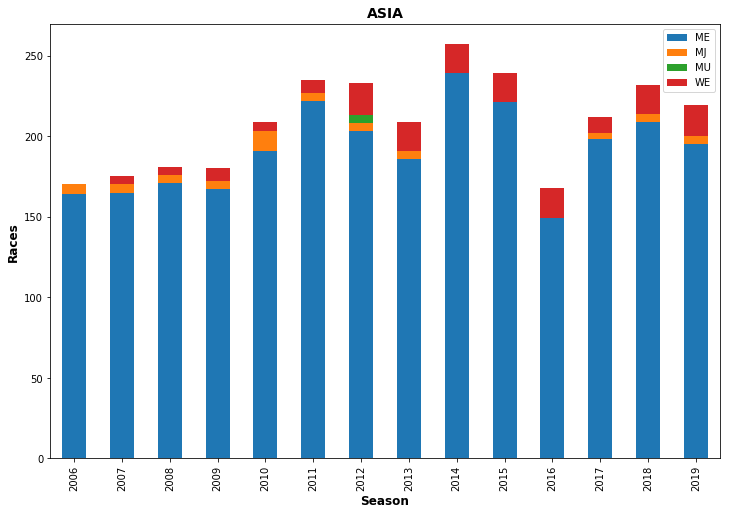

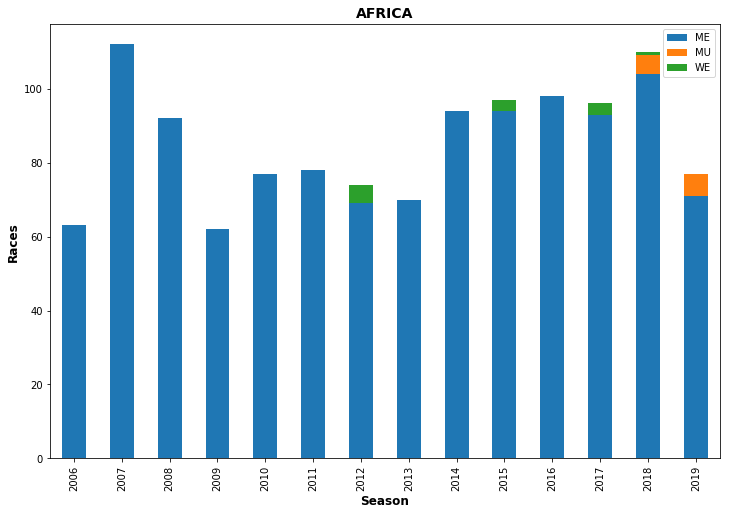

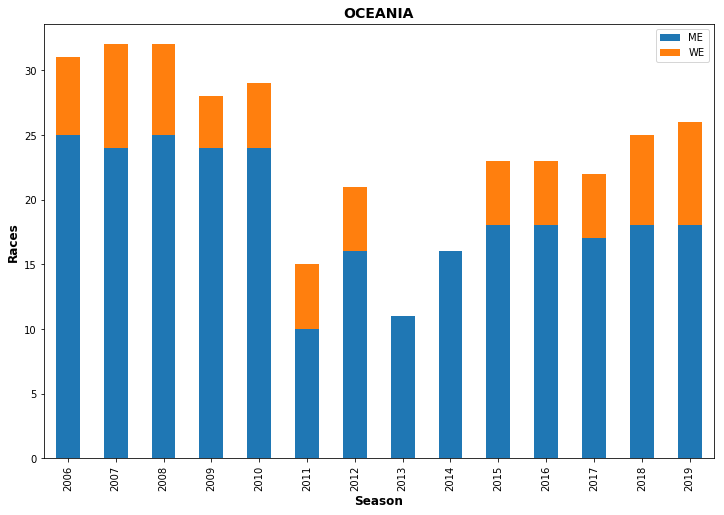

In [8]:
# Graphing by Continent
conti_df = [americas,europe,asia,africa,oceania]

try:
    for item in conti_df:
        x = 'Season'
        y = 'Races'
        title = item.continent.min()
        file = 'Filename_' + str(title)
        pdf = item.groupby(['Season','Category']).sum()['Race_Days'].unstack(['Category'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

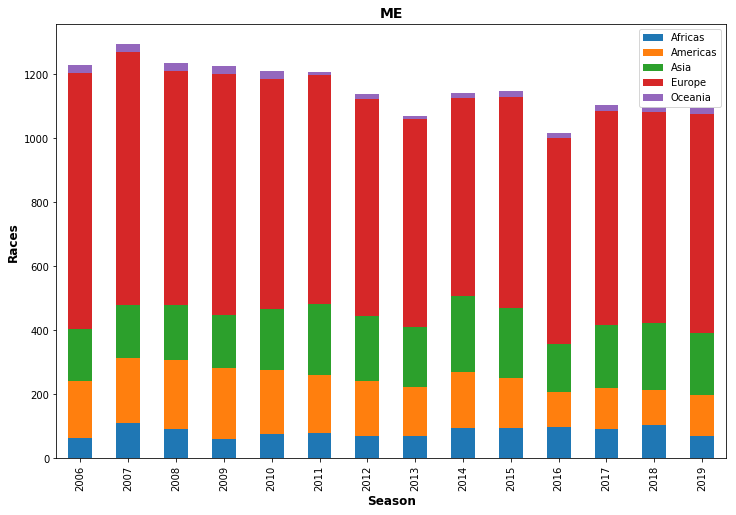

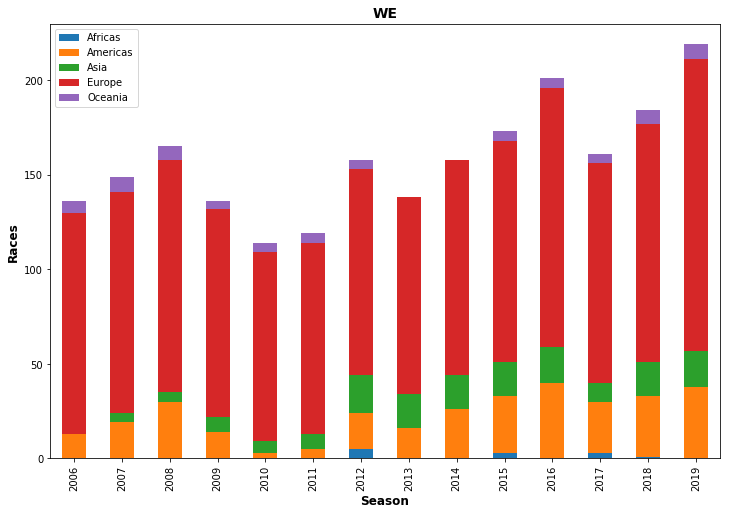

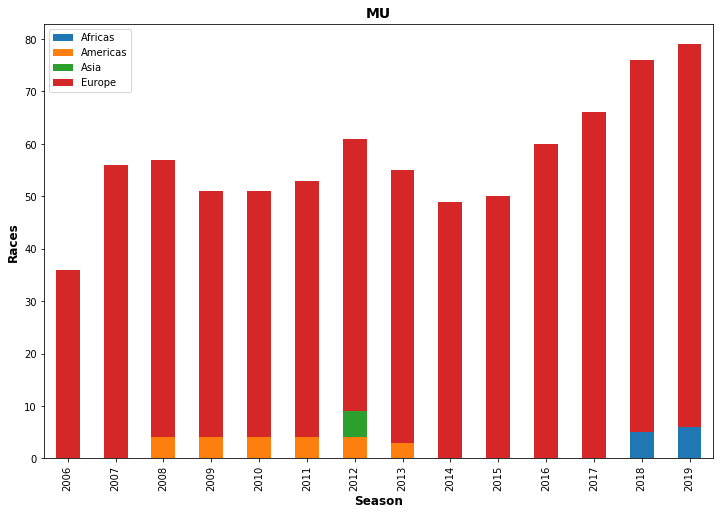

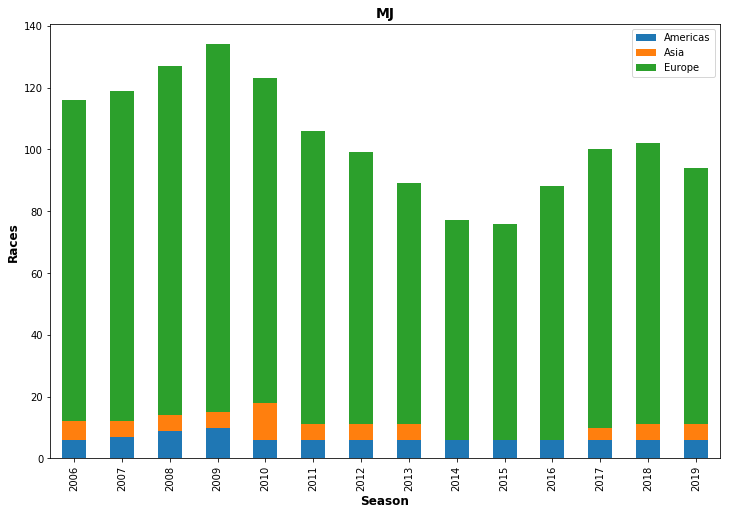

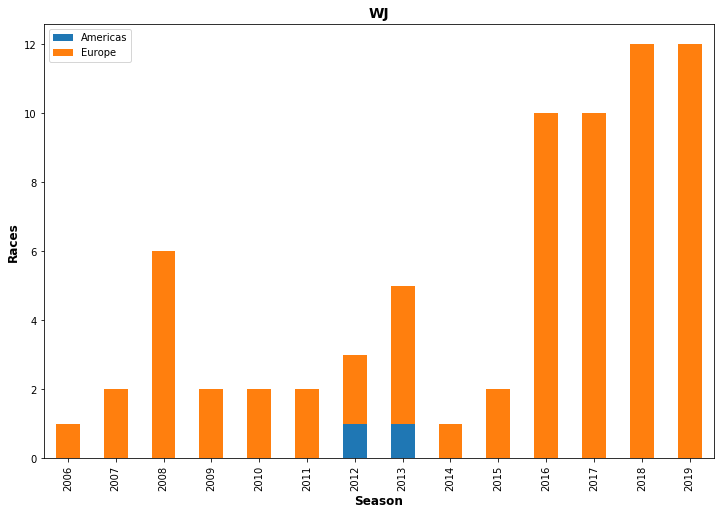

In [9]:
# Graphing by Category
cat_df = [me,we,u23,mj,wj]

try:
    for item in cat_df:
        x = 'Season'
        y = 'Races'
        title = item.Category.min()
        file = 'Filename_' + str(title)
        pdf = item.groupby(['Season','Continent']).sum()['Race_Days'].unstack(['Continent'], fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for continent {title}')

In [10]:
stackedbar(conti_years,'Season','Races','Overall','Overall_World')


NameError: name 'conti_years' is not defined

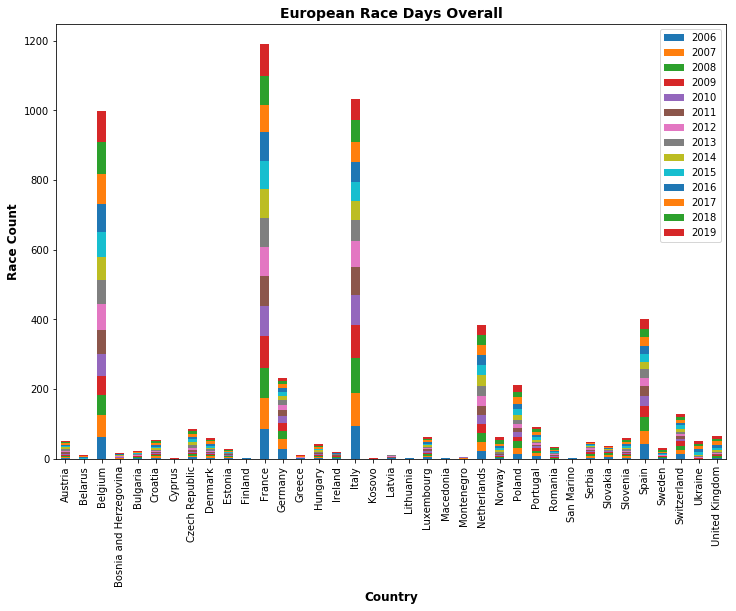

In [11]:
cc_days = europe.groupby(['name','Season'])['Name'].count().unstack('Season')
stackedbar(cc_days,'Country','Race Count','European Race Days Overall','European_Overall_Days')

In [27]:
top7 = ['Belgium','France','Italy','Netherlands','Spain','Poland','Germany','United Kingdom','United States']
# top7rc = df.loc[df['name'].isin(top7)]
# me.loc[me['name']==]
# men_t = men_races.groupby(['name','Season'])['Race_Days'].sum().unstack('Season',fill_value=0)
# men_races


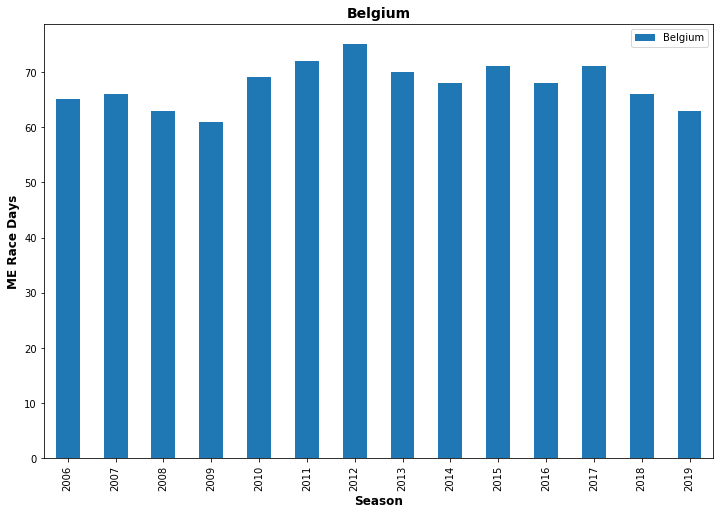

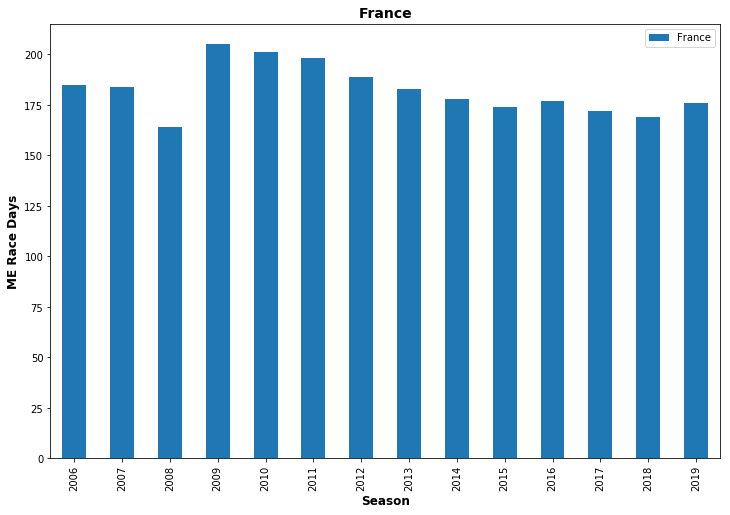

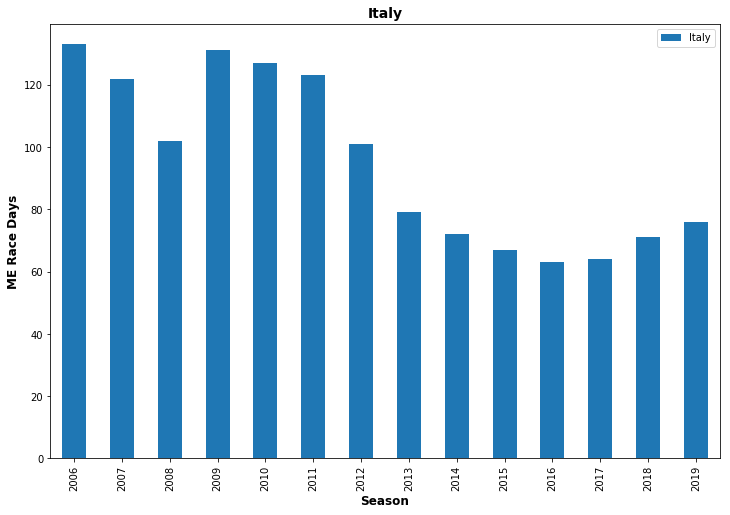

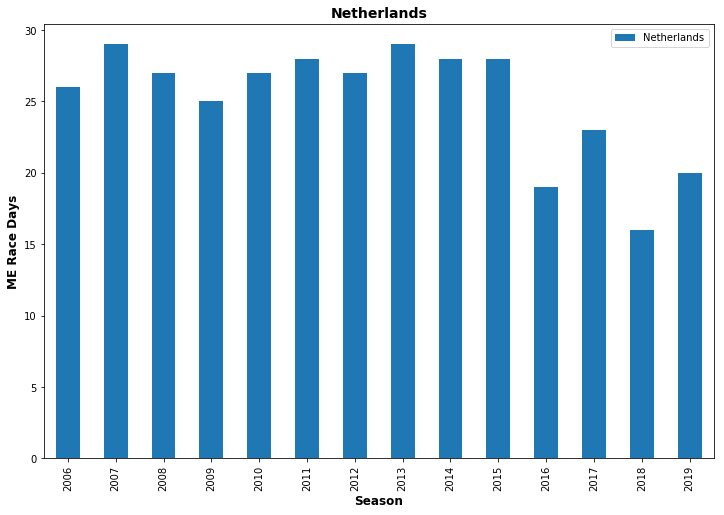

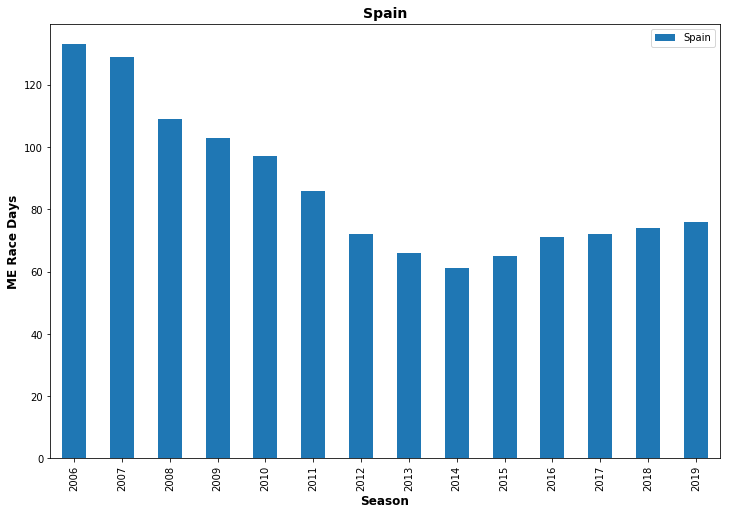

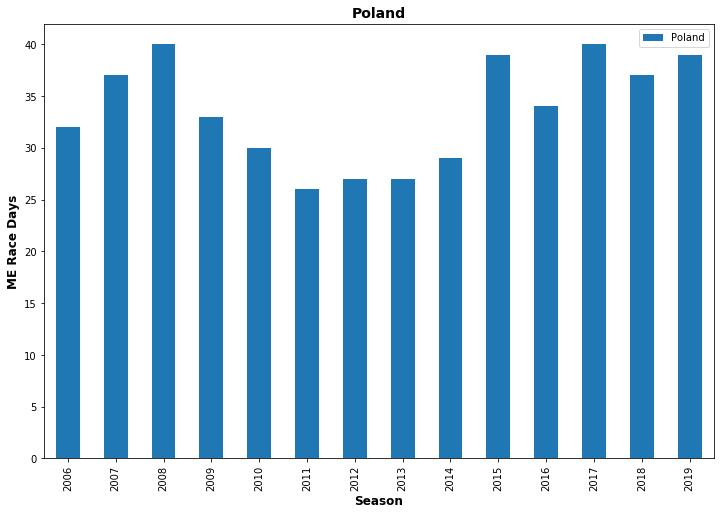

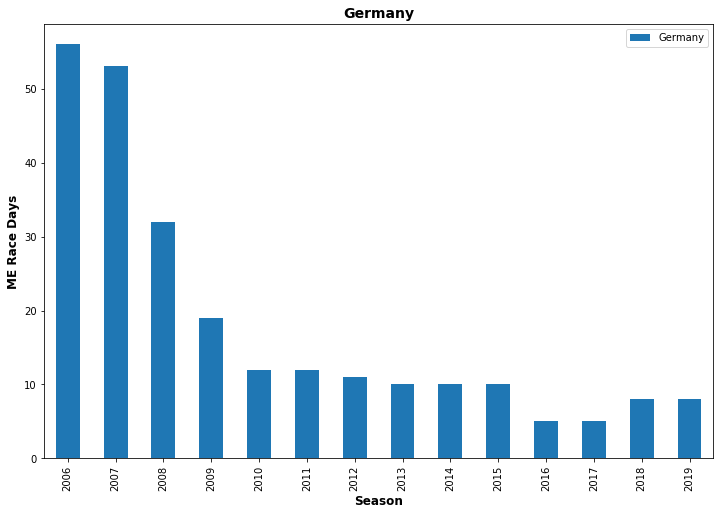

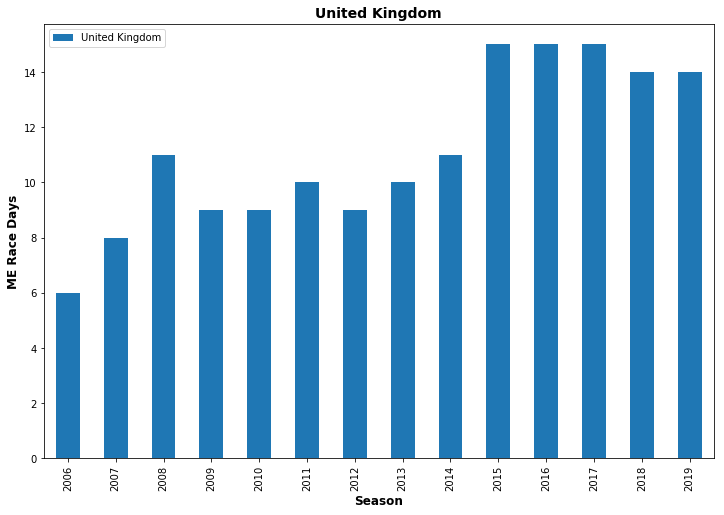

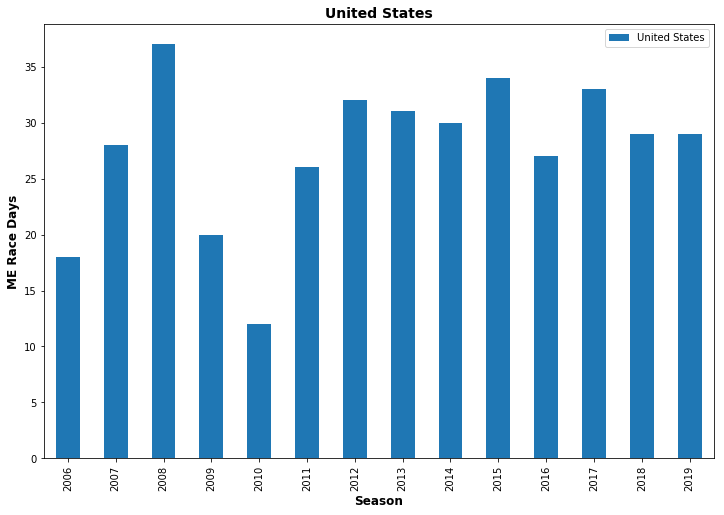

In [28]:
try:
    for item in top7:
        x = 'Season'
        y = 'ME Race Days'
        title = item
        file = 'ME_Filename_' + str(title)
        tdf = me.loc[me['name']==item]
        pdf = tdf.groupby(['name','Season'])['Race_Days'].sum().unstack('name',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

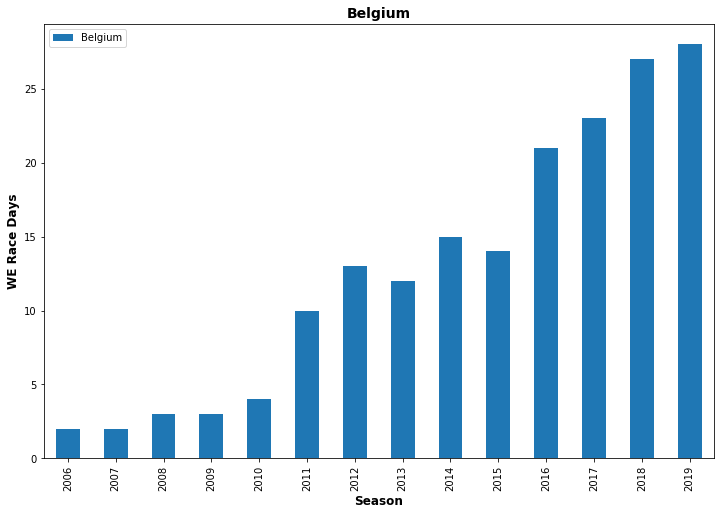

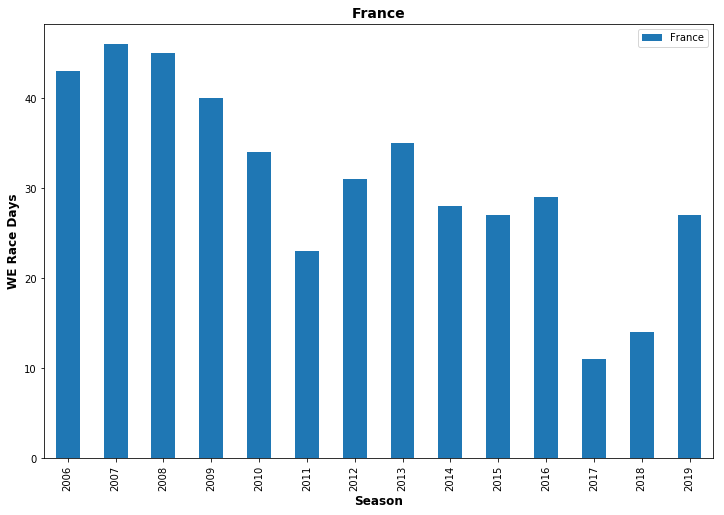

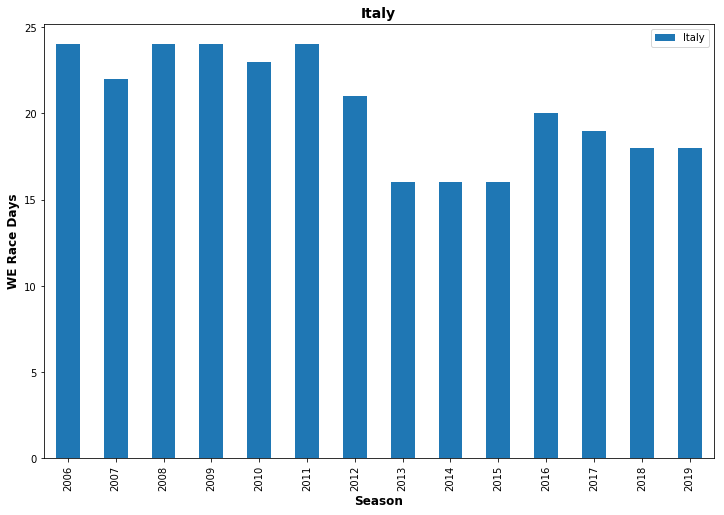

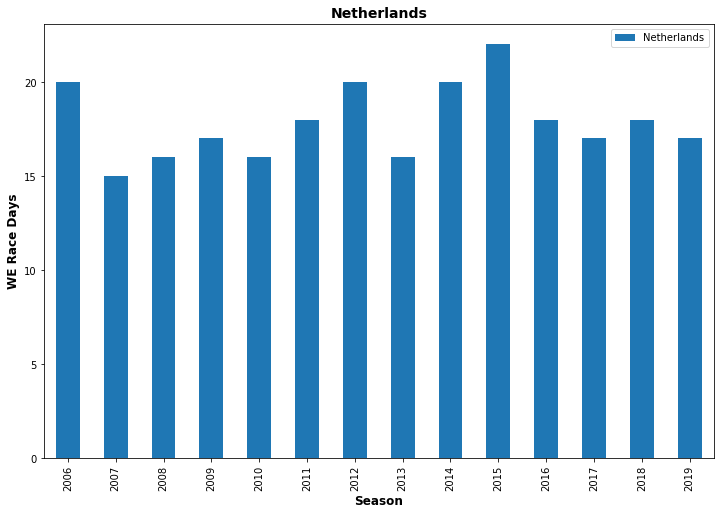

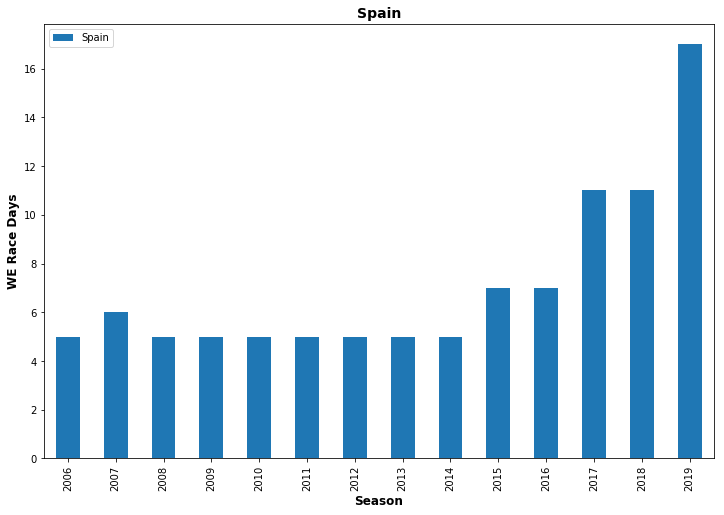

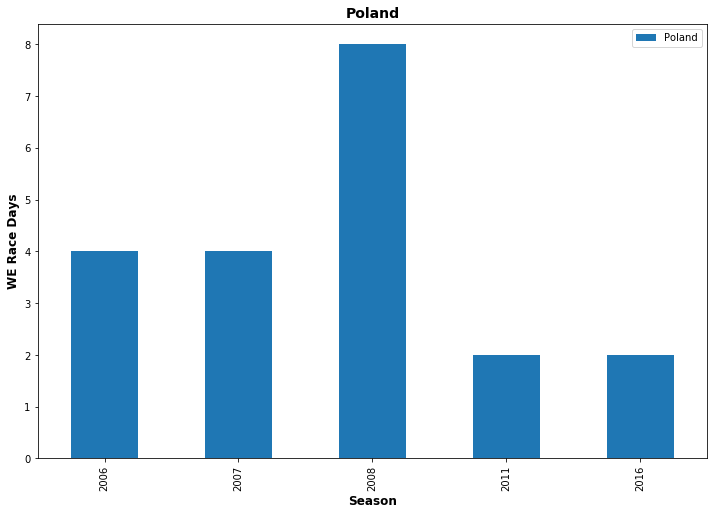

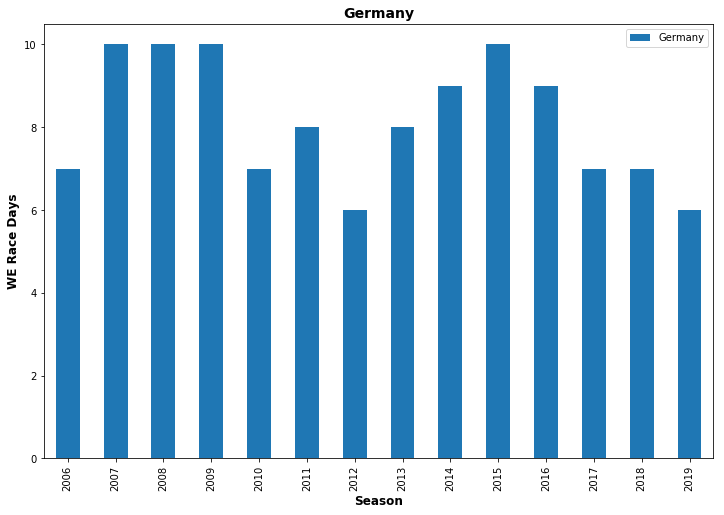

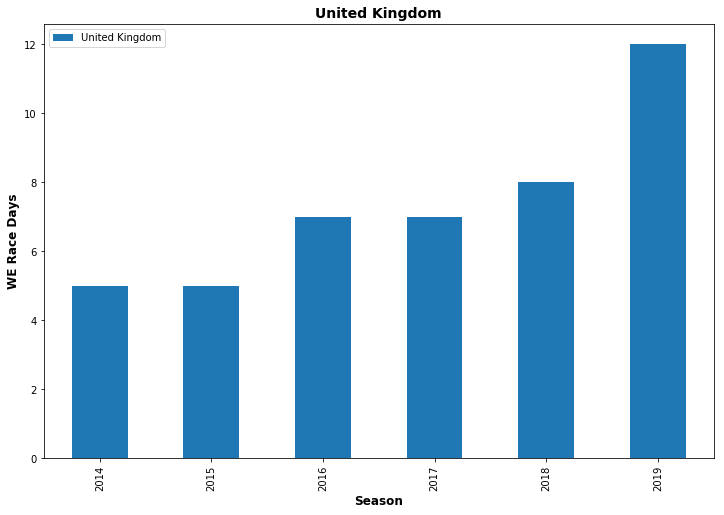

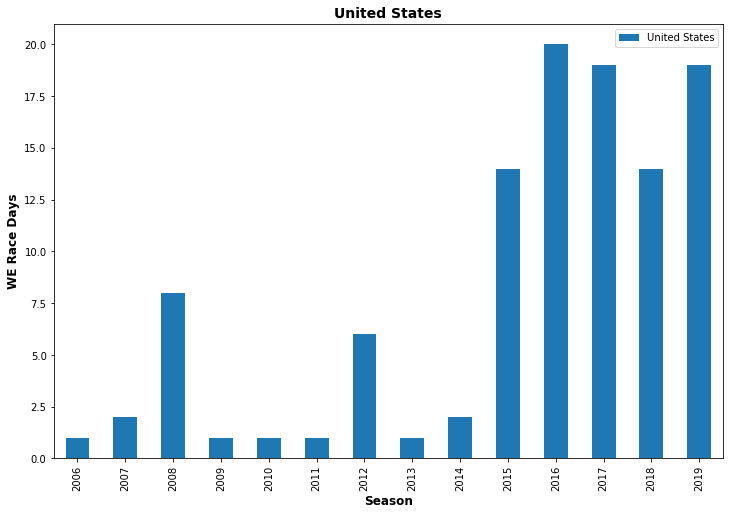

In [25]:
try:
    for item in top7:
        x = 'Season'
        y = 'WE Race Days'
        title = item
        file = 'WE_Filename_' + str(title)
        tdf = we.loc[we['name']==item]
        pdf = tdf.groupby(['name','Season'])['Race_Days'].sum().unstack('name',fill_value=0)
        stackedbar(pdf, x, y, title,file)

except TypeError:
    print(f'No values for {title}')

In [15]:
mean = men_races.mean()
overall_mean = mean.mean()

In [30]:
# men_races.plot(kind='bar',width=0.9)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,200)

# plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Country', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('ME Races Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('races.png')

In [31]:
# top7 = ['Belgium','France','Italy','Netherlands','Spain','United Kingdom','United States']
# big7 = df.loc[df['name'].isin(top7)]
# big7 = big7.loc[big7['Category']=='WE']
# big7 = big7.groupby(['name','Season'])['Race_Days'].sum().unstack('Season')
# big7

In [32]:
# big7.plot(kind='bar',width=0.9)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Country', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('WE Race Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('we_races.png')

In [33]:
# menwomen = df.groupby(['Season','Category'])['Race_Days'].sum().unstack('Category')
# menwomen.plot(kind='bar',width=0.9,stacked=True)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Season', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('Overall Race Days per Season by Category', fontsize=14, fontweight='bold')
# plt.legend(loc='best')
# plt.savefig('overall_races_stacked.png')

In [34]:
# menwomen = df.loc[df['Continent'].isin(['Europe','Americas'])]
# menwomen = menwomen.groupby(['Continent','Category','Season'])['Race_Days'].sum().unstack(['Category','Continent'],fill_value=0)
# menwomen

In [35]:
# menwomen.plot(kind='bar',width=0.9,stacked=True)
# fig = plt.gcf()
# fig.set_size_inches(12, 8)
# fig.ylimit=(0,400)
# fig.xlimit=(0,30)
# # plt.hlines(overall_mean, -1, 30, alpha=0.2, label='Overall mean', color='red')
# # Add some labels and title
# plt.xlabel('Country', fontsize=12, fontweight='bold')
# plt.ylabel('Race days by season', fontsize=12, fontweight='bold')
# plt.title('WE Race Days per Season by country', fontsize=14, fontweight='bold')
# plt.savefig('we_races_cont_stacked.png')